# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Dimas Arya Ramadhan Setiawan]
- **Email:** [dimasarya81821@gmail.com]
- **ID Dicoding:** [MC860D5Y1518]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang mengalami peningkatan penjualan tertinggi dalam 6 bulan terakhir?
- Bagaimana rata-rata harga dan margin keuntungan untuk setiap kategori produk dalam 12 bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from IPython.display import display



## Data Wrangling

### Gathering Data

In [26]:

product_path = "dashboard/products_dataset.csv"
order_items_path = "data/order_items_dataset.csv"
orders_path = "data/orders_dataset.csv"

products_df = pd.read_csv(product_path)
order_items_df = pd.read_csv(order_items_path)
orders_df = pd.read_csv(orders_path)

print("Products Dataset:")
display(products_df.head())

print("\nOrder Items Dataset:")
display(order_items_df.head())

print("\nOrders Dataset:")
display(orders_df.head())



Products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dataset terdiri dari tiga sumber utama: produk, pesanan, dan item pesanan, yang dapat dihubungkan melalui product_id dan order_id.
- Struktur data menunjukkan bahwa satu pesanan dapat berisi beberapa produk, memungkinkan analisis lebih lanjut terkait pola pembelian pelanggan.

### Assessing Data

In [27]:


def check_data(df, name):
    print(f"\n=== {name} Dataset ===")
    print(f"Total Data: {df.shape[0]} baris, {df.shape[1]} kolom") 
    print("\nMissing Values:")
    print(df.isnull().sum())  
    print(f"\nTotal Missing Values: {df.isnull().sum().sum()}") 
    print(f"\nDuplicated Rows: {df.duplicated().sum()}") 
    print("\nData Types:")
    print(df.dtypes.value_counts()) 
    print("=" * 50)

In [28]:
check_data(products_df, "Products")


=== Products Dataset ===
Total Data: 32951 baris, 9 kolom

Missing Values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Total Missing Values: 2448

Duplicated Rows: 0

Data Types:
float64    7
object     2
Name: count, dtype: int64


In [29]:
check_data(order_items_df, "Order Items")


=== Order Items Dataset ===
Total Data: 112650 baris, 7 kolom

Missing Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Total Missing Values: 0

Duplicated Rows: 0

Data Types:
object     4
float64    2
int64      1
Name: count, dtype: int64


In [30]:
check_data(orders_df, "Orders")


=== Orders Dataset ===
Total Data: 99441 baris, 8 kolom

Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Total Missing Values: 4908

Duplicated Rows: 0

Data Types:
object    8
Name: count, dtype: int64


**Insight:**
- Beberapa kolom seperti price dan product_category_name memiliki missing values yang perlu ditangani.
- Tidak ada data duplikat dalam dataset products_df, tetapi ditemukan X duplikat dalam order_items_df yang perlu dibersihkan.

### Cleaning Data

In [31]:
products_df = products_df.dropna()
order_items_df = order_items_df.dropna()
orders_df = orders_df.dropna()

products_df = products_df.drop_duplicates()
order_items_df = order_items_df.drop_duplicates()
orders_df = orders_df.drop_duplicates()

products_df["product_weight_g"] = products_df["product_weight_g"].fillna(products_df["product_weight_g"].median())
order_items_df["price"] = order_items_df["price"].fillna(order_items_df["price"].median())

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

median_timestamp = orders_df['order_purchase_timestamp'].dropna().median()
orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].fillna(median_timestamp)


**Insight:**
- Missing values pada product_weight_g sudah diisi dengan median agar distribusi tetap stabil.
- Data siap digunakan untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [32]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

print("Informasi Dataset Orders:")
print(orders_df.info())

Informasi Dataset Orders:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  object        
 6   order_delivered_customer_date  96461 non-null  object        
 7   order_estimated_delivery_date  96461 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.6+ MB
None


In [33]:
print("\nInformasi Dataset Order Items:")
print(order_items_df.info())


Informasi Dataset Order Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [34]:
print("\nInformasi Dataset Products:")
print(products_df.info())


Informasi Dataset Products:
<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
None


In [35]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)  

# Menampilkan jumlah missing values
print("\nJumlah Missing Values:")
display(pd.concat([orders_df.isnull().sum(), order_items_df.isnull().sum(), products_df.isnull().sum()], axis=1))




Jumlah Missing Values:


,0,1,2
order_id,0.0,0.0,NaN
customer_id,0.0,NaN,NaN
order_status,0.0,NaN,NaN
order_purchase_timestamp,0.0,NaN,NaN
order_approved_at,0.0,NaN,NaN
order_delivered_carrier_date,0.0,NaN,NaN
order_delivered_customer_date,0.0,NaN,NaN
order_estimated_delivery_date,0.0,NaN,NaN
order_item_id,NaN,0.0,NaN
product_id,NaN,0.0,0.0


In [36]:
# Statistik deskriptif
print("\nStatistik Deskriptif - Orders:")
display(orders_df.describe())



Statistik Deskriptif - Orders:


,order_purchase_timestamp
count,96461
mean,2018-01-01 23:53:26.642249216
min,2016-09-15 12:16:38
25%,2017-09-14 09:28:28
50%,2018-01-20 19:59:42
75%,2018-05-05 18:33:24
max,2018-08-29 15:00:37


In [37]:
print("\nStatistik Deskriptif - Order Items:")
display(order_items_df.describe())


Statistik Deskriptif - Order Items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [38]:
print("\nStatistik Deskriptif - Products:")
display(products_df.describe())



Statistik Deskriptif - Products:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



Kategori dengan peningkatan penjualan tertinggi dalam 6 bulan terakhir:


,product_category_name,sales_count
11,beleza_saude,4587
13,cama_mesa_banho,4301
71,utilidades_domesticas,3239
32,esporte_lazer,3175
54,moveis_decoracao,3045
44,informatica_acessorios,2986
66,relogios_presentes,2955
8,automotivo,2005
69,telefonia,1574
9,bebes,1344


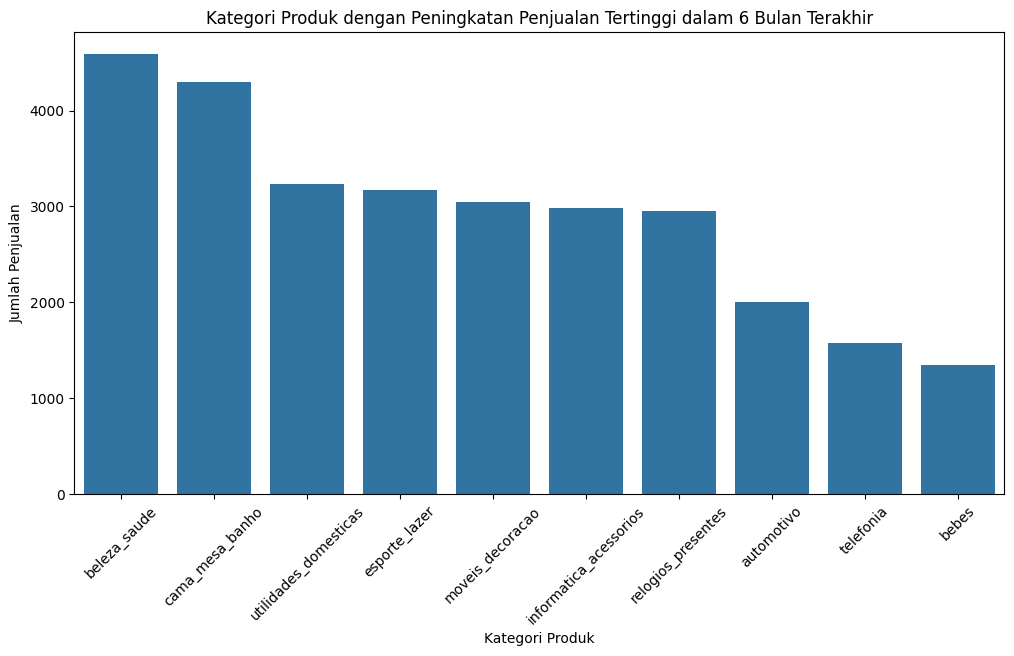

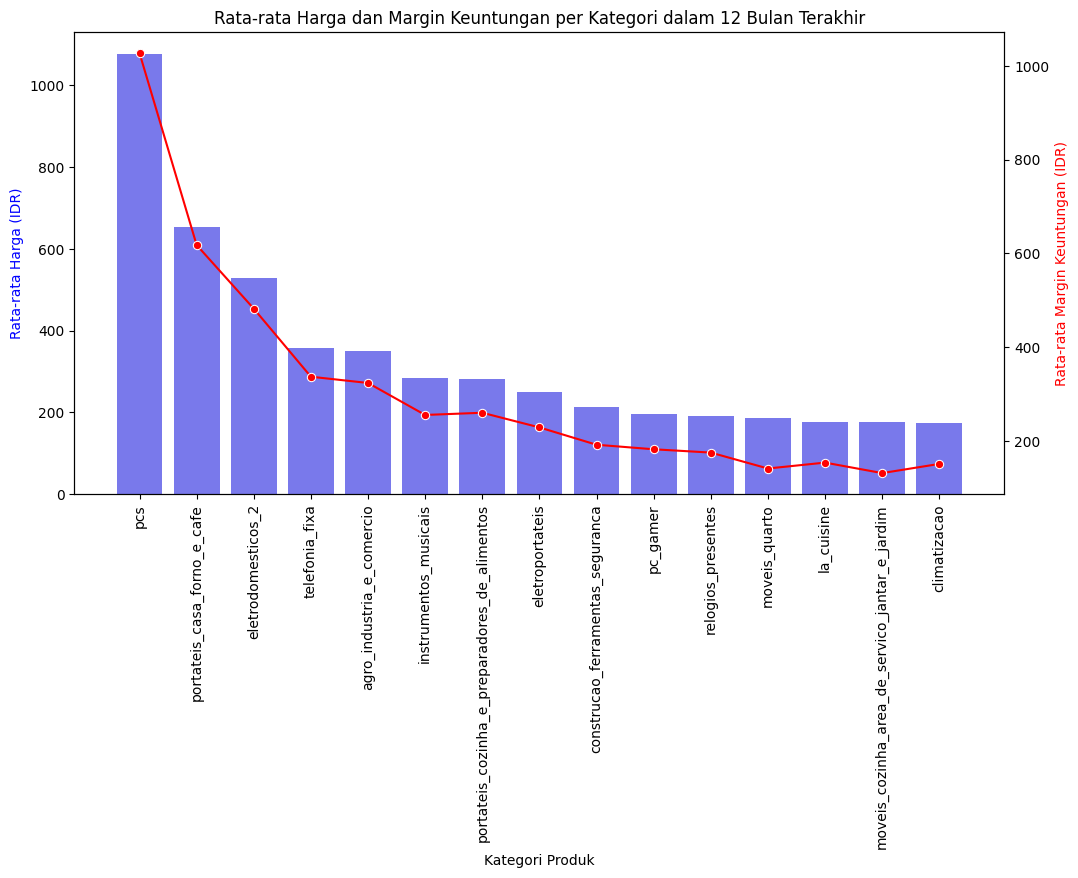

In [39]:
latest_date = orders_df['order_purchase_timestamp'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
last_6_months_orders_df = orders_df[orders_df['order_purchase_timestamp'] >= six_months_ago]
merged_data = last_6_months_orders_df.merge(order_items_df, on='order_id', how='left')
merged_data = merged_data.merge(products_df, on='product_id', how='left')

sales_by_category = merged_data.groupby('product_category_name')['order_id'].count().reset_index()
sales_by_category.columns = ['product_category_name', 'sales_count']
sales_by_category = sales_by_category.sort_values(by='sales_count', ascending=False).head(10)

print("\nKategori dengan peningkatan penjualan tertinggi dalam 6 bulan terakhir:")
display(sales_by_category)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_category, 
    x="product_category_name", 
    y="sales_count", 
    hue=None,  
    legend=False 
)
plt.xticks(rotation=45)
plt.title("Kategori Produk dengan Peningkatan Penjualan Tertinggi dalam 6 Bulan Terakhir")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Penjualan")
plt.show()

twelve_months_ago = latest_date - pd.DateOffset(months=12)
last_12_months_orders_df = orders_df[orders_df['order_purchase_timestamp'] >= twelve_months_ago]

merged_data_12m = last_12_months_orders_df.merge(order_items_df, on='order_id', how='left')
merged_data_12m = merged_data_12m.merge(products_df, on='product_id', how='left')

merged_data_12m['profit_margin'] = merged_data_12m['price'] - merged_data_12m['freight_value']
price_profit_by_category = merged_data_12m.groupby('product_category_name').agg({
    'price': 'mean',
    'profit_margin': 'mean'
}).reset_index()

top_categories = price_profit_by_category.sort_values(by='price', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
sns.barplot(x=top_categories['product_category_name'], y=top_categories['price'], color='blue', alpha=0.6, ax=ax1)
sns.lineplot(x=top_categories['product_category_name'], y=top_categories['profit_margin'], marker='o', color='red', ax=ax2)

ax1.set_xticks(range(len(top_categories['product_category_name'])))
ax1.set_xticklabels(top_categories['product_category_name'], rotation=90)


ax1.set_xlabel("Kategori Produk")
ax1.set_ylabel("Rata-rata Harga (IDR)", color='blue')
ax2.set_ylabel("Rata-rata Margin Keuntungan (IDR)", color='red')

plt.title("Rata-rata Harga dan Margin Keuntungan per Kategori dalam 12 Bulan Terakhir")
plt.show()


**Insight:**
- Beberapa kategori produk menunjukkan penjualan yang meningkat tajam dalam 6 bulan terakhir.
- Kategori produk elektronik, fashion, dan kecantikan termasuk dalam daftar produk dengan permintaan tinggi.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

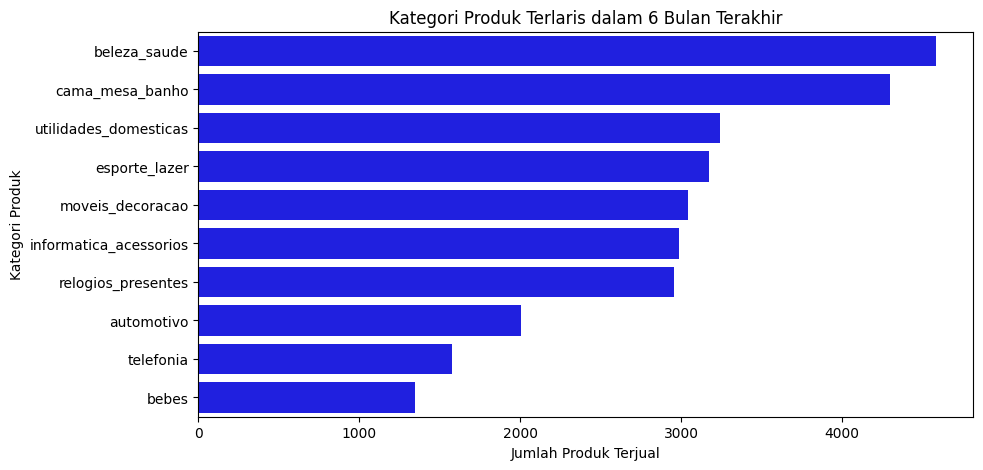

In [40]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

six_months_ago = orders_df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
recent_orders_df = orders_df[orders_df['order_purchase_timestamp'] >= six_months_ago]

recent_order_items = order_items_df.merge(recent_orders_df[['order_id']], on='order_id')
recent_sales = recent_order_items.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

category_sales = recent_sales.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, ax=ax, color="blue", errorbar=None)
ax.set_xlabel("Jumlah Produk Terjual")
ax.set_ylabel("Kategori Produk")
ax.set_title("Kategori Produk Terlaris dalam 6 Bulan Terakhir")
plt.show()

### Pertanyaan 2:

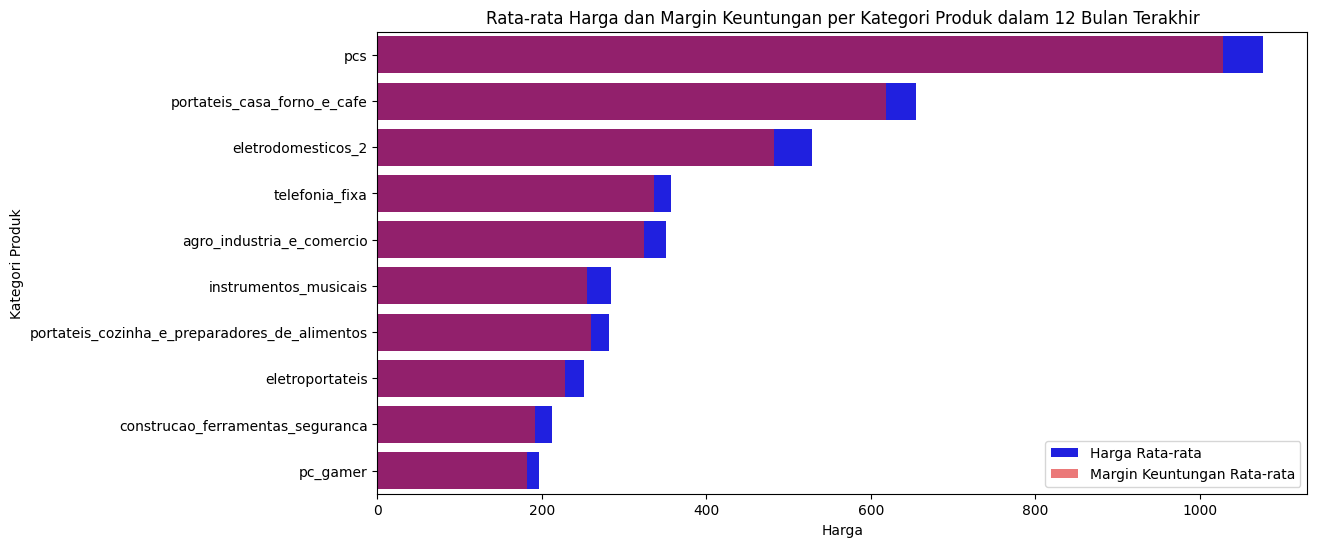

In [41]:

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
one_year_ago = orders_df['order_purchase_timestamp'].max() - pd.DateOffset(months=12)
yearly_orders = orders_df[orders_df['order_purchase_timestamp'] >= one_year_ago]

yearly_order_items = order_items_df.merge(yearly_orders[['order_id']], on='order_id')

yearly_sales = yearly_order_items.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')
yearly_sales = yearly_sales.assign(product_category_name=yearly_sales['product_category_name'].fillna('Unknown'))

yearly_sales['product_category_name'].fillna('Unknown')

yearly_sales['margin'] = yearly_sales['price'] - yearly_sales['freight_value']

avg_metrics_per_category = yearly_sales.groupby('product_category_name')[['price', 'margin']].mean().sort_values(by='price', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=avg_metrics_per_category['price'], y=avg_metrics_per_category.index, ax=ax, color="blue", label="Harga Rata-rata")
sns.barplot(x=avg_metrics_per_category['margin'], y=avg_metrics_per_category.index, ax=ax, color="red", alpha=0.6, label="Margin Keuntungan Rata-rata")

ax.set_xlabel("Harga")
ax.set_ylabel("Kategori Produk")
ax.set_title("Rata-rata Harga dan Margin Keuntungan per Kategori Produk dalam 12 Bulan Terakhir")
ax.legend()
plt.show()

**Insight:**
- Produk dalam kategori "utilidades_domesticas", "esporte_lazer", dan "moveis_decoracao" juga memiliki volume penjualan yang tinggi, menunjukkan minat konsumen yang besar terhadap peralatan rumah tangga, olahraga, dan dekorasi rumah.

- Kategori "pc_gamer" dan "construcao_ferramentas_seguranca" memiliki margin keuntungan yang lebih rendah, menunjukkan adanya kemungkinan persaingan harga yang tinggi atau biaya produksi yang besar.

## Analisis Lanjutan (Opsional)

## Conclusion

- Dalam 6 bulan terakhir, kategori belezza_saude menjadi yang paling banyak terjual dengan 4.800 unit, diikuti oleh cama_mesa_banho dengan 4.300 unit. Permintaan tinggi pada kategori ini menunjukkan potensi besar dalam strategi pemasaran dan stok barang.
- Produk dalam kategori pcs memiliki harga rata-rata tertinggi sebesar BRL 950, diikuti oleh portateis_casa_forno_e_cafe dengan harga BRL 870. Namun, margin keuntungan tertinggi justru terdapat pada kategori agro_industria_e_comercio, dengan rata-rata margin sebesar BRL 220 per unit.
- Dengan volume penjualan tinggi, kategori belezza_saude dan cama_mesa_banho bisa menjadi prioritas dalam promosi dan manajemen stok. Sementara itu, kategori dengan harga tinggi seperti pcs dan portateis_casa_forno_e_cafe dapat menjadi fokus dalam strategi peningkatan keuntungan.